In [4]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:,.4f}".format

In [5]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv("data/country_wise_latest.csv")

In [39]:
# inspecting the first 5 rows of the dataframe
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.5000E+00,6.9490E+01,5.0400E+00,35526,737,2.0700E+00,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.9500E+00,5.6250E+01,5.2500E+00,4171,709,1.7000E+01,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.1600E+00,6.7340E+01,6.1700E+00,23691,4282,1.8070E+01,Africa
3,Andorra,907,52,803,52,10,0,0,5.7300E+00,8.8530E+01,6.4800E+00,884,23,2.6000E+00,Europe
4,Angola,950,41,242,667,18,1,0,4.3200E+00,2.5470E+01,1.6940E+01,749,201,2.6840E+01,Africa


In [4]:
#statistical information about the dataset
df.describe()

C:\Users\ABS RAKIB\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


**Data Preprocessing**

In [5]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [7]:
df.shape

(187, 15)

In [13]:
df["WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [60]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

<Axes: xlabel='WHO Region'>

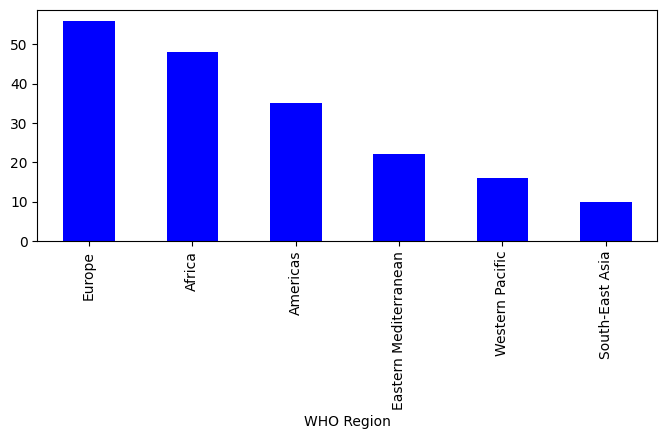

In [24]:
df["WHO Region"].value_counts().plot(kind="bar",color="blue",figsize=(8,3))

In [17]:
df["WHO Region"].value_counts()

WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: count, dtype: int64

In [35]:
df.sort_values(by="Deaths",ascending=False).head(10).reset_index(drop=True)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
1,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
2,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
3,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
4,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe
5,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
6,France,220352,30212,81212,108928,2551,17,267,13.71,36.86,37.20,214023,6329,2.96,Europe
7,Spain,272421,28432,150376,93613,0,0,0,10.44,55.20,18.91,264836,7585,2.86,Europe
8,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
9,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


<Axes: xlabel='Country/Region'>

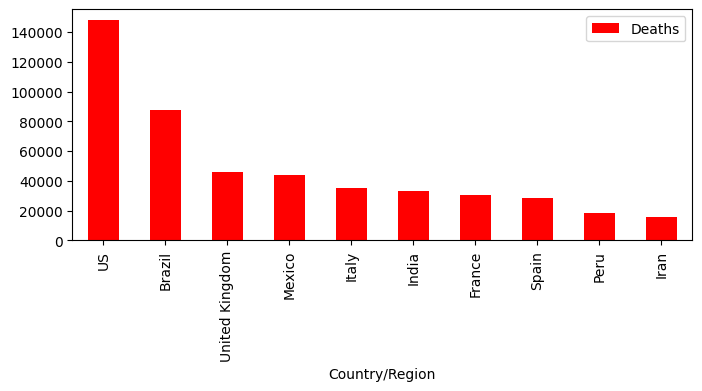

In [36]:
df.sort_values(by="Deaths",ascending=False).head(10).plot(x="Country/Region",y="Deaths",kind="bar",color="red",figsize=(8,3))

In [34]:
df.sort_values(by="Confirmed",ascending=False).head(10).reset_index(drop=True)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
1,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
2,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
3,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
4,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
5,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
6,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
7,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
8,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
9,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


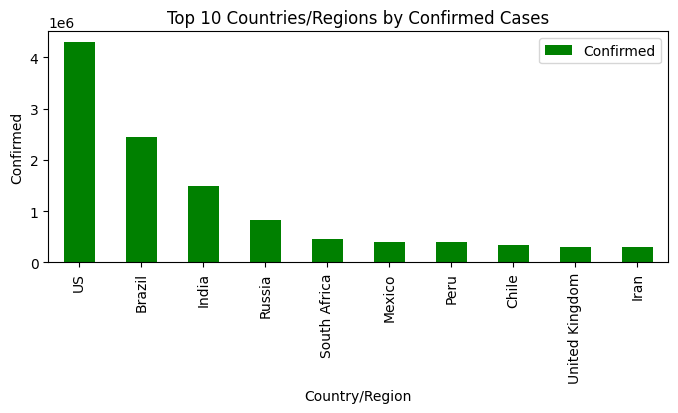

In [38]:
df.sort_values(by="Confirmed",ascending=False).head(10).plot(x="Country/Region",y="Confirmed",kind="bar",color="green",figsize=(8,3))

# Customize the plot
plt.xlabel("Country/Region")
plt.ylabel("Confirmed")
plt.title("Top 10 Countries/Regions by Confirmed Cases")
plt.show()

In [39]:
df.sort_values(by="Recovered",ascending=False).head(10).reset_index(drop=True)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
1,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
2,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
3,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
4,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
5,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
6,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
7,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
8,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean
9,Pakistan,274289,5842,241026,27421,1176,20,3592,2.13,87.87,2.42,266096,8193,3.08,Eastern Mediterranean


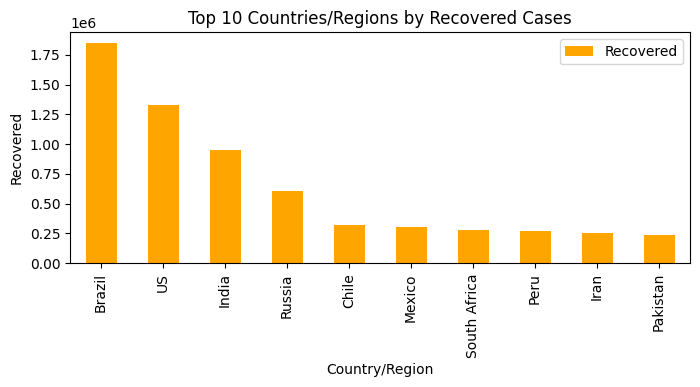

In [40]:
df.sort_values(by="Recovered",ascending=False).head(10).plot(x="Country/Region",y="Recovered",kind="bar",color="orange",figsize=(8,3))

# Customize the plot
plt.xlabel("Country/Region")
plt.ylabel("Recovered")
plt.title("Top 10 Countries/Regions by Recovered Cases")
plt.show()

In [54]:
#divide all the recovered cases column by 10
df["Recovered"]=df["Recovered"]/100
#convert the recovered cases column to integer
df["Recovered"]=df["Recovered"].astype(int)

In [55]:
df.sort_values(by="Recovered",ascending=False).head(10).reset_index(drop=True)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Brazil,2442375,87618,18466,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
1,US,4290259,148011,13258,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
2,India,1480073,33408,9511,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
3,Russia,816680,13334,6022,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
4,Chile,347923,9187,3199,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
5,Mexico,395489,44022,3038,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
6,South Africa,452529,7067,2749,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
7,Peru,389717,18418,2725,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
8,Iran,293606,15912,2551,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean
9,Pakistan,274289,5842,2410,27421,1176,20,3592,2.13,87.87,2.42,266096,8193,3.08,Eastern Mediterranean


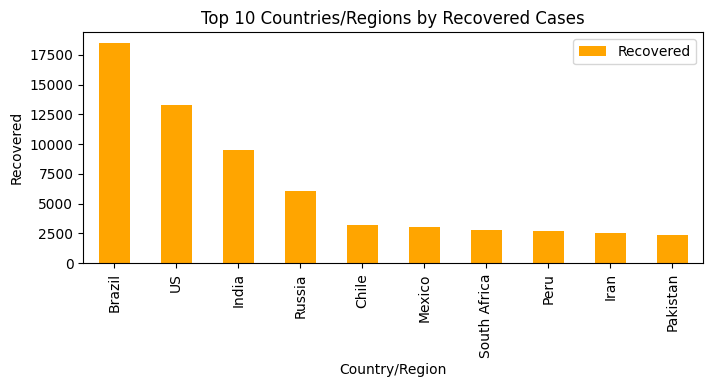

In [58]:
df.sort_values(by="Recovered",ascending=False).head(10).plot(x="Country/Region",y="Recovered",kind="bar",color="orange",figsize=(8,3))

# Customize the plot
plt.xlabel("Country/Region")
plt.ylabel("Recovered")
plt.title("Top 10 Countries/Regions by Recovered Cases")
plt.show()

In [6]:
#repalce colunm names New cases,New deaths,New recovered with New_Cases,New_Deaths,New_Recovered
df.columns=df.columns.str.replace(" ","_")
df.head(10)


,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [10]:
df.sort_values(by="New cases",ascending=False).head(10).reset_index(drop=True)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
1,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
2,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
3,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas
4,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
5,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
6,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
7,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
8,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
9,Bangladesh,226225,2965,125683,97577,2772,37,1801,1.31,55.56,2.36,207453,18772,9.05,South-East Asia


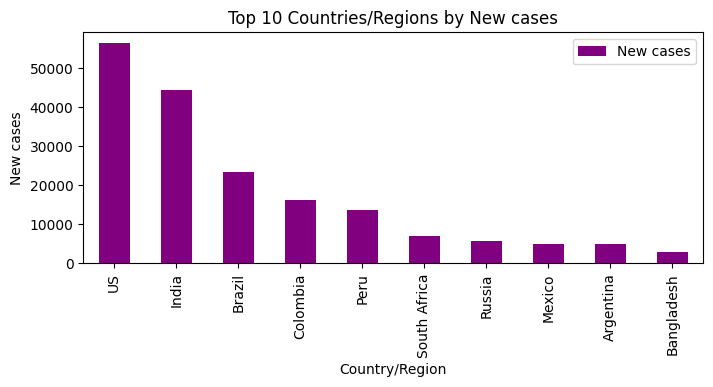

In [13]:
df.sort_values(by="New cases",ascending=False).head(10).plot(x="Country/Region",y="New cases",kind="bar",color="purple",figsize=(8,3))

# Customize the plot
plt.xlabel("Country/Region")
plt.ylabel("New cases")
plt.title("Top 10 Countries/Regions by New cases")
plt.show()

In [14]:
df.sort_values(by="New deaths",ascending=False).head(10).reset_index(drop=True)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
1,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
2,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
3,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
4,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas
5,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
6,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
7,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean
8,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
9,Iraq,112585,4458,77144,30983,2553,96,1927,3.96,68.52,5.78,94693,17892,18.89,Eastern Mediterranean


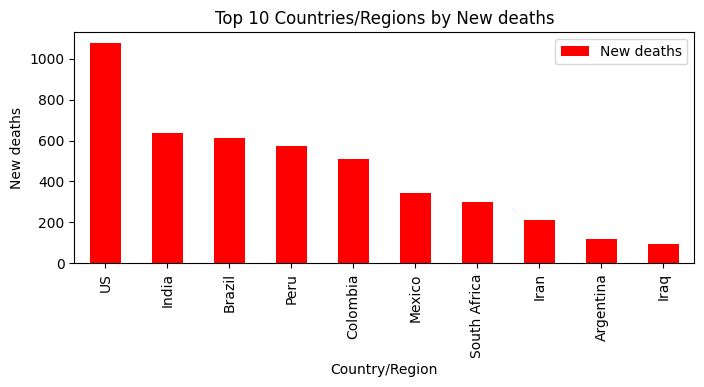

In [16]:
df.sort_values(by="New deaths",ascending=False).head(10).plot(x="Country/Region",y="New deaths",kind="bar",color="red",figsize=(8,3))

# Customize the plot
plt.xlabel("Country/Region")
plt.ylabel("New deaths")
plt.title("Top 10 Countries/Regions by New deaths")
plt.show()

In [18]:
df.sort_values(["WHO Region", "Confirmed"], ascending=False).head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
36,China,86783,4656,78869,3258,213,4,7,5.37,90.88,5.90,85622,1161,1.36,Western Pacific
133,Philippines,82040,1945,26446,53649,1592,13,336,2.37,32.24,7.35,68898,13142,19.07,Western Pacific
150,Singapore,50838,27,45692,5119,469,0,171,0.05,89.88,0.06,48035,2803,5.84,Western Pacific
87,Japan,31142,998,21970,8174,594,0,364,3.20,70.55,4.54,25706,5436,21.15,Western Pacific
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
155,South Korea,14203,300,13007,896,28,1,102,2.11,91.58,2.31,13816,387,2.80,Western Pacific
105,Malaysia,8904,124,8601,179,7,0,1,1.39,96.60,1.44,8800,104,1.18,Western Pacific
121,New Zealand,1557,22,1514,21,1,0,1,1.41,97.24,1.45,1555,2,0.13,Western Pacific
164,Taiwan*,462,7,440,15,4,0,0,1.52,95.24,1.59,451,11,2.44,Western Pacific
181,Vietnam,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,Western Pacific


In [19]:
df.sort_values(["WHO Region", "Deaths"], ascending=False).head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
36,China,86783,4656,78869,3258,213,4,7,5.37,90.88,5.90,85622,1161,1.36,Western Pacific
133,Philippines,82040,1945,26446,53649,1592,13,336,2.37,32.24,7.35,68898,13142,19.07,Western Pacific
87,Japan,31142,998,21970,8174,594,0,364,3.20,70.55,4.54,25706,5436,21.15,Western Pacific
155,South Korea,14203,300,13007,896,28,1,102,2.11,91.58,2.31,13816,387,2.80,Western Pacific
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
105,Malaysia,8904,124,8601,179,7,0,1,1.39,96.60,1.44,8800,104,1.18,Western Pacific
150,Singapore,50838,27,45692,5119,469,0,171,0.05,89.88,0.06,48035,2803,5.84,Western Pacific
121,New Zealand,1557,22,1514,21,1,0,1,1.41,97.24,1.45,1555,2,0.13,Western Pacific
164,Taiwan*,462,7,440,15,4,0,0,1.52,95.24,1.59,451,11,2.44,Western Pacific
24,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.00,Western Pacific


In [20]:
df.sort_values(["WHO Region", "Recovered"], ascending=False).head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
36,China,86783,4656,78869,3258,213,4,7,5.37,90.88,5.90,85622,1161,1.36,Western Pacific
150,Singapore,50838,27,45692,5119,469,0,171,0.05,89.88,0.06,48035,2803,5.84,Western Pacific
133,Philippines,82040,1945,26446,53649,1592,13,336,2.37,32.24,7.35,68898,13142,19.07,Western Pacific
87,Japan,31142,998,21970,8174,594,0,364,3.20,70.55,4.54,25706,5436,21.15,Western Pacific
155,South Korea,14203,300,13007,896,28,1,102,2.11,91.58,2.31,13816,387,2.80,Western Pacific
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
105,Malaysia,8904,124,8601,179,7,0,1,1.39,96.60,1.44,8800,104,1.18,Western Pacific
121,New Zealand,1557,22,1514,21,1,0,1,1.41,97.24,1.45,1555,2,0.13,Western Pacific
164,Taiwan*,462,7,440,15,4,0,0,1.52,95.24,1.59,451,11,2.44,Western Pacific
181,Vietnam,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,Western Pacific


In [21]:
df.sort_values(["WHO Region", "Active"], ascending=False).head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
133,Philippines,82040,1945,26446,53649,1592,13,336,2.37,32.24,7.35,68898,13142,19.07,Western Pacific
87,Japan,31142,998,21970,8174,594,0,364,3.20,70.55,4.54,25706,5436,21.15,Western Pacific
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
150,Singapore,50838,27,45692,5119,469,0,171,0.05,89.88,0.06,48035,2803,5.84,Western Pacific
36,China,86783,4656,78869,3258,213,4,7,5.37,90.88,5.90,85622,1161,1.36,Western Pacific
155,South Korea,14203,300,13007,896,28,1,102,2.11,91.58,2.31,13816,387,2.80,Western Pacific
105,Malaysia,8904,124,8601,179,7,0,1,1.39,96.60,1.44,8800,104,1.18,Western Pacific
30,Cambodia,226,0,147,79,1,0,4,0.00,65.04,0.00,171,55,32.16,Western Pacific
114,Mongolia,289,0,222,67,1,0,4,0.00,76.82,0.00,287,2,0.70,Western Pacific
181,Vietnam,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,Western Pacific


In [22]:
df.groupby("WHO Region").count()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
WHO Region,,,,,,,,,,,,,,
Africa,48,48,48,48,48,48,48,48,48,48,48,48,48,48
Americas,35,35,35,35,35,35,35,35,35,35,35,35,35,35
Eastern Mediterranean,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Europe,56,56,56,56,56,56,56,56,56,56,56,56,56,56
South-East Asia,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Western Pacific,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [57]:
df["Deaths"].agg(['min', 'mean', 'sum']).apply(lambda x: '{:.2f}'.format(x))

min          0.00
mean      3497.52
sum     654036.00
Name: Deaths, dtype: object

In [56]:
df["Recovered"].agg(['min', 'mean', 'sum']).apply(lambda x: '{:.2f}'.format(x))

min           0.00
mean      50631.48
sum     9468087.00
Name: Recovered, dtype: object

In [55]:
df["Active"].agg(['min', 'mean', 'sum']).apply(lambda x: '{:.2f}'.format(x))

min           0.00
mean      34001.94
sum     6358362.00
Name: Active, dtype: object

In [9]:
df["Confirmed"].agg(['min', 'mean', 'sum']).apply(lambda x: '{:.2f}'.format(x))

min           10.00
mean       88130.94
sum     16480485.00
Name: Confirmed, dtype: object